In [1]:
import os
import math
import random

import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torch.utils.data
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision import utils
%env CUDA_LAUNCH_BLOCKING=1
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

env: CUDA_LAUNCH_BLOCKING=1


In [208]:
resety

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
batch_size = 32

dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('./data/mnist', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                   ])),
    batch_size=batch_size, 
    shuffle=True)

In [5]:
def weights_init(m):
    if isinstance(m, nn.ConvTranspose2d) or isinstance(m, nn.Conv2d):
        m.weight.data.normal_(mean=0.0, std=0.02)
    elif isinstance(m, nn.BatchNorm2d):
        if m.weight is not None:
            m.weight.data.normal_(mean=1.0, std=0.02)
        if m.bias is not None:
            m.bias.data.fill_(0)

In [6]:
import math

def filter(x,y, kernel, stride, pad=1):
    return math.floor((x +2*pad - kernel) / stride + 1), math.floor((y + 2*pad - kernel) / stride + 1)

def cal_output_sise(x, y):
    x, y = filter(x, y, 3, 2)
    x, y = filter(x, y, 3, 2)
    x, y = filter(x, y, 3, 2)
    print((x),(y))

cal_output_sise(28, 28)

4 4


In [32]:
# 32  kernel_size 4 stride 2 padding 1
# 64  kernel_size 4 stride 2 padding 1
# 1   kernel_size 7 stride 1 padding 0


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.conv_1 = nn.Conv2d(1, 3, kernel_size=3, stride=2, padding=1)
        
        self.conv_2 = nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1)
        self.batch_norm_1 = nn.BatchNorm2d(32)
                
        self.conv_3 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.batch_norm_2 = nn.BatchNorm2d(64)
        
        self.linear = nn.Linear(64 * 4 * 4, 1)
        #self.linear_2 = nn.Linear(128, 1)
        
        self.apply(weights_init)
        
    def forward(self, image):
        '''
        Inputs:
            image: (batch x 1 x 28 x 28)
        Outputs:
            prob: (batch x 1)
        '''

        z = self.conv_1(image)
        z = F.leaky_relu(z, 0.2)

        
        z = self.conv_2(z)
        z = self.batch_norm_1(z)
        z = F.leaky_relu(z, 0.2)

        z = self.conv_3(z)
        z = self.batch_norm_2(z) 
        z = F.leaky_relu(z, 0.2)
        
        z = z.view(z.size(0), -1)
        z = self.linear(z)
        #z = self.linear_2(z)
        z = torch.sigmoid(z)
        
        return z
        
       
    
class Generator(nn.Module):
    def __init__(self, z_size):
        super(Generator, self).__init__()
        
        self.conv_1 = nn.ConvTranspose2d(z_size, 64, kernel_size=7, stride=1, padding=0, bias = False)
        
        self.conv_2 = nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1, bias = False)
        self.batch_norm_2 = nn.BatchNorm2d(32)
        
        self.conv_3 = nn.ConvTranspose2d(32, 1, kernel_size=4, stride=2, padding=1, bias = False)
        #self.batch_norm_3 = nn.BatchNorm2d(1)

        
        self.apply(weights_init)

    def forward(self, noise):
        '''
        Inputs:
            noise: (batch x latent_size)
        Outputs:
            image: (batch x 1 x 28 x 28)
        '''
        noise = noise.unsqueeze(-1).unsqueeze(-1)

        
        z = self.conv_1(noise)
        z = torch.tanh(z)
        
        z = self.conv_2(z)
        z = self.batch_norm_2(z)
        z = torch.tanh(z)
        
        z = self.conv_3(z)
#         z = self.batch_norm_3(z)
        z = torch.tanh(z)

    
        return z

In [33]:
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    
def show_image(generated_image):
    image = generated_image.cpu().detach()

    im_size = image.size(2)

    grid = utils.make_grid(image)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

In [34]:
latent_size = 100

generator     = Generator(latent_size).to(device)
discriminator = Discriminator().to(device)

adversarial_loss = nn.BCELoss()

lr    = 0.0002
beta1 = 0.5
beta2 = 0.999

gen_optimizer = optim.Adam(generator.parameters(),     lr=lr, betas=(beta1, beta2))
dis_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, beta2))


epoch      = 0
num_epochs = 25

dis_losses = []
gen_losses = []

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


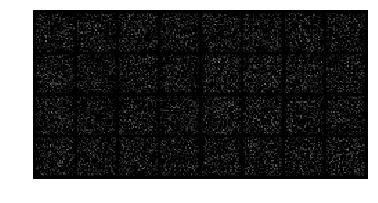

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


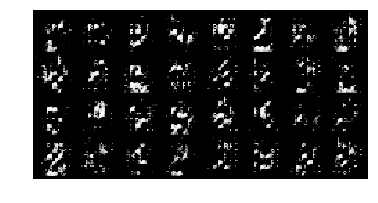

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


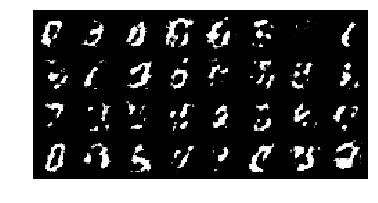

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


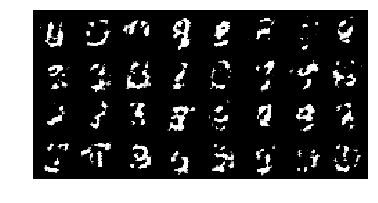

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


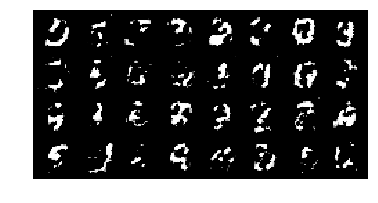

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


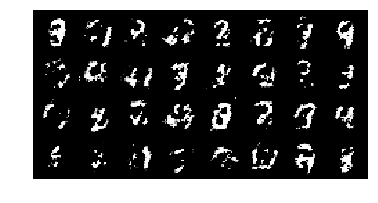

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


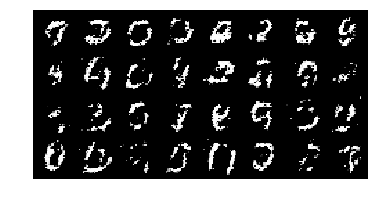

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


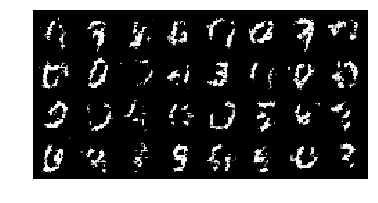

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


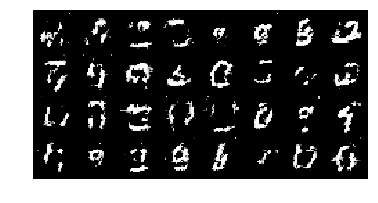

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


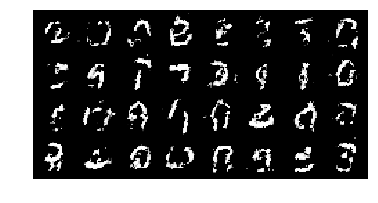

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


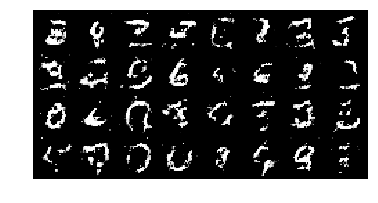

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


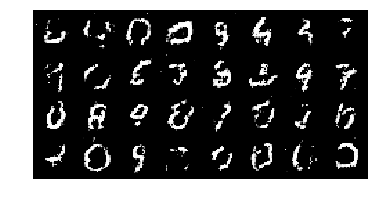

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


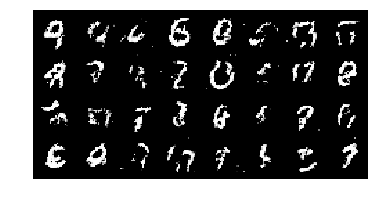

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


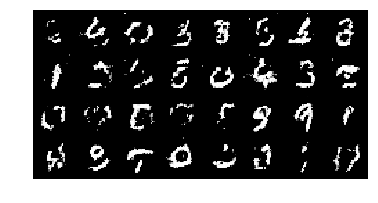

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


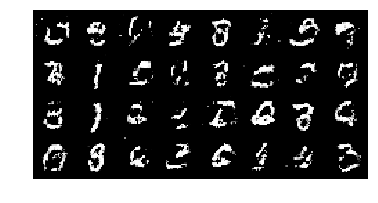

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


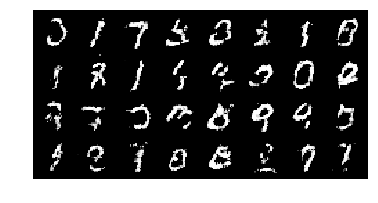

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


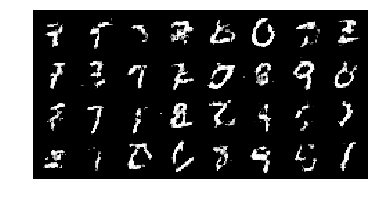

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


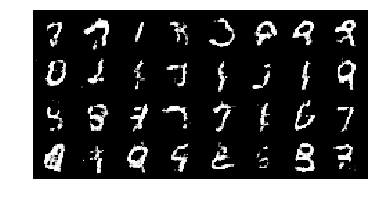

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


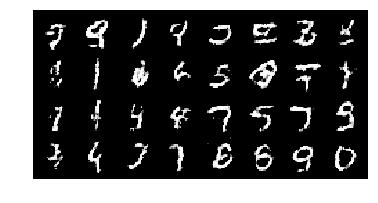

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


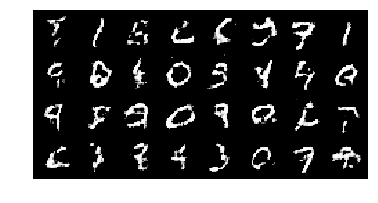

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


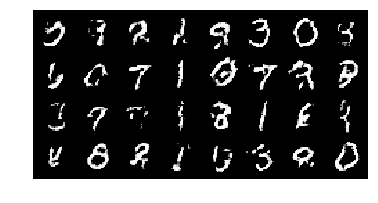

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


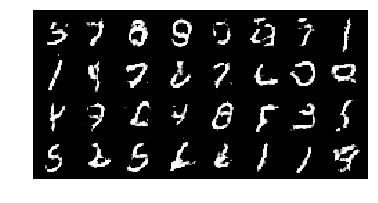

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


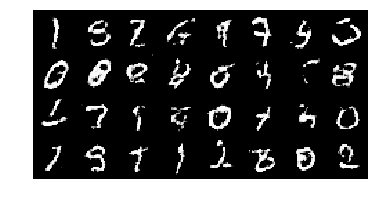

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


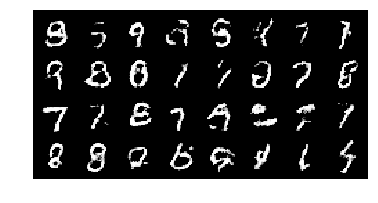

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


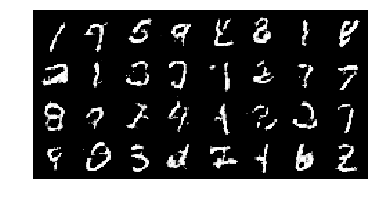

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


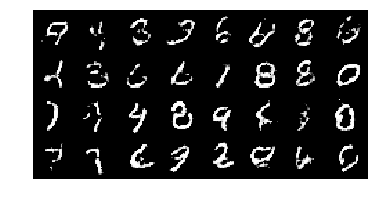

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


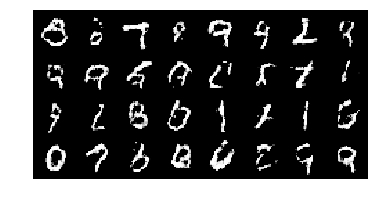

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


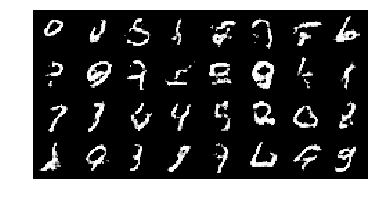

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


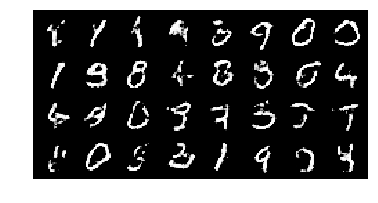

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


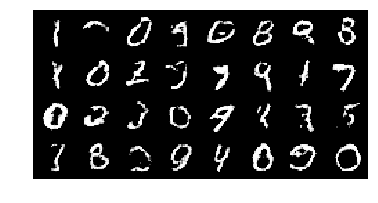

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


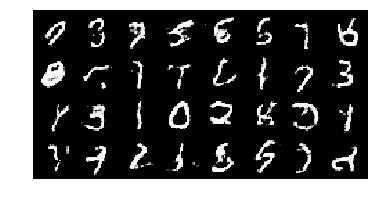

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


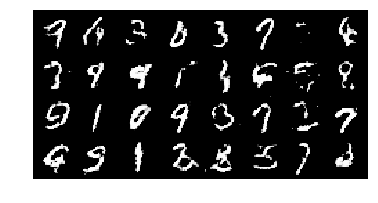

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


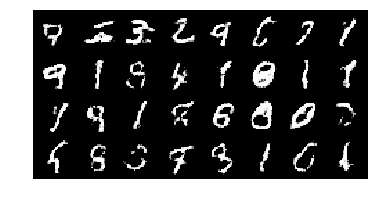

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


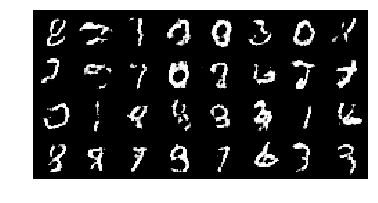

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


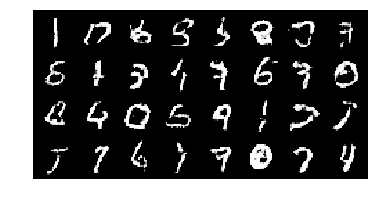

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


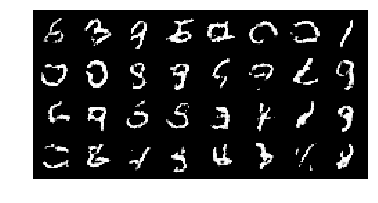

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


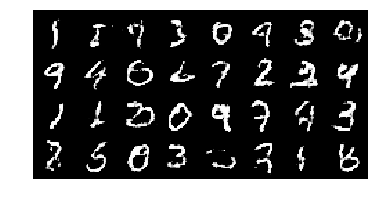

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


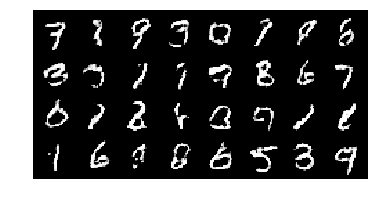

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


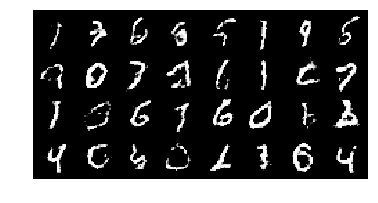

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


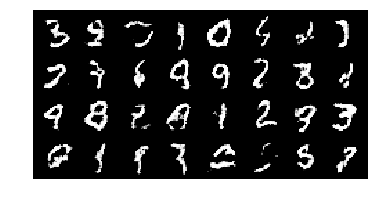

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


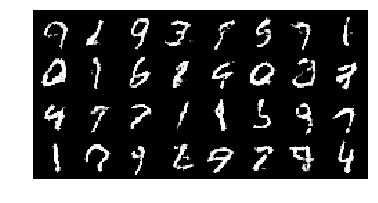

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


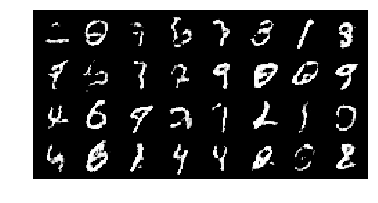

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


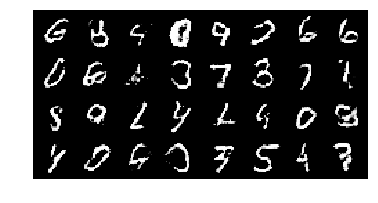

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


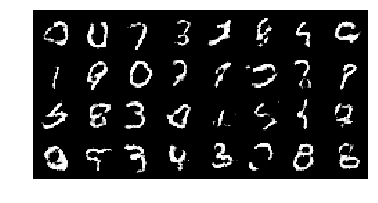

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


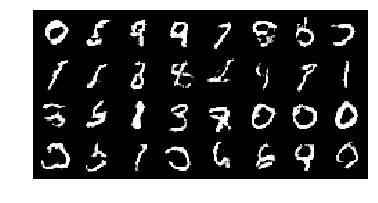

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


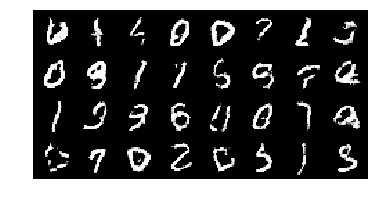

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


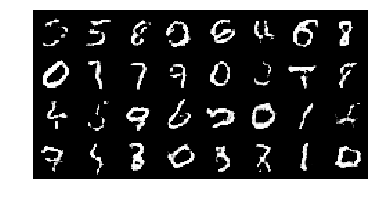

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


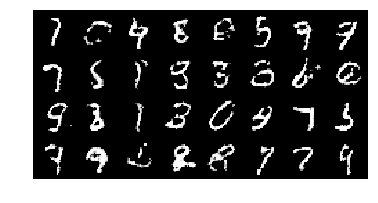

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


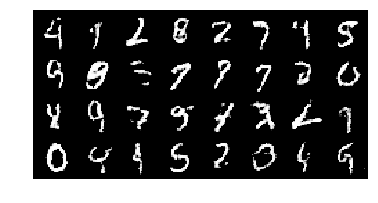

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


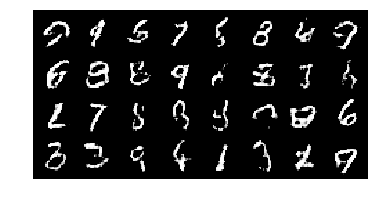

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


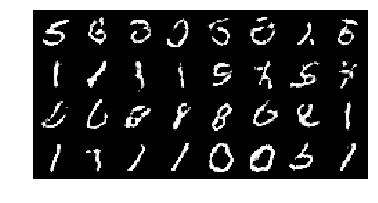

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


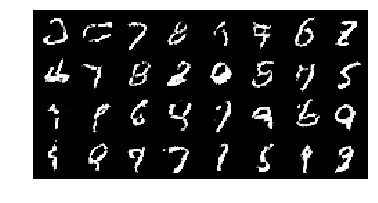

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


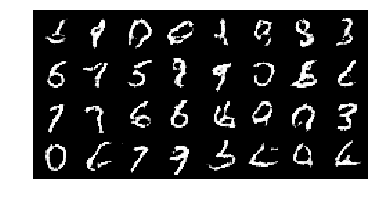

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


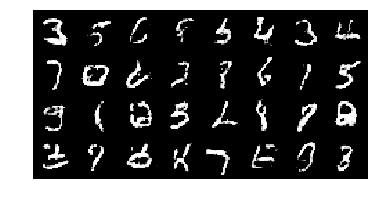

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


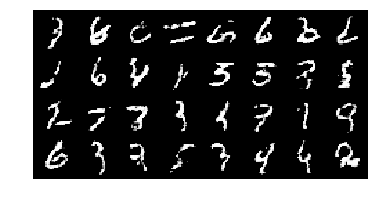

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


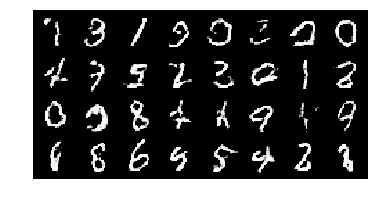

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


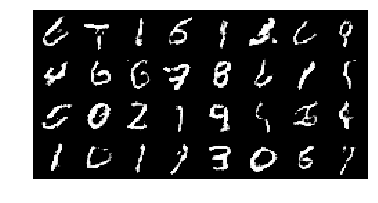

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


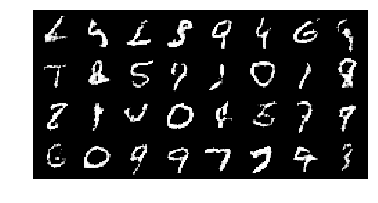

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


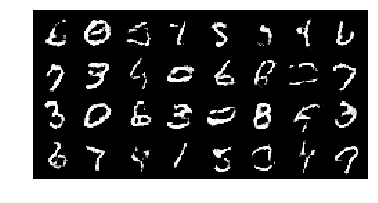

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


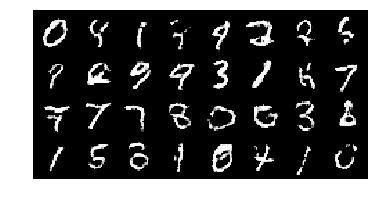

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


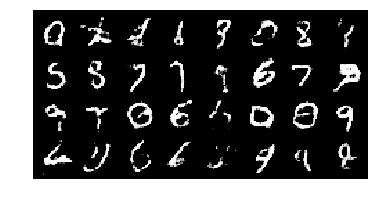

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


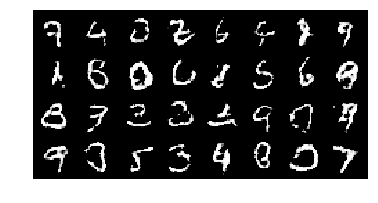

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


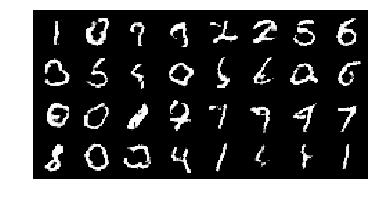

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


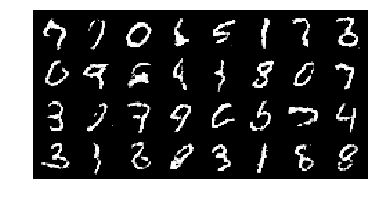

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


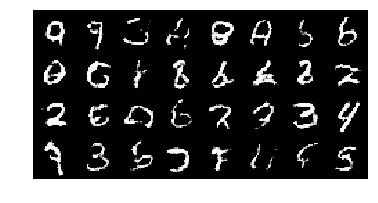

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


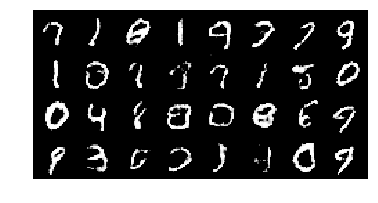

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


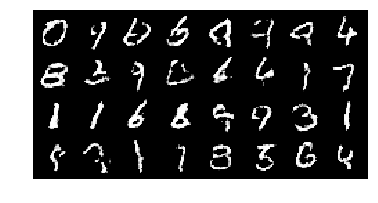

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


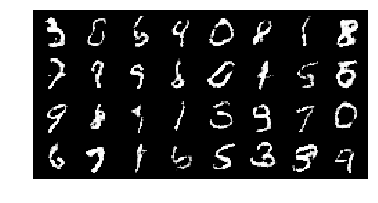

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


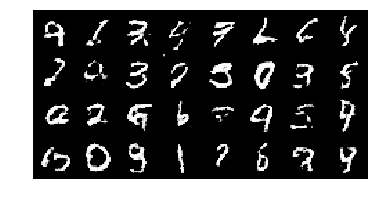

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


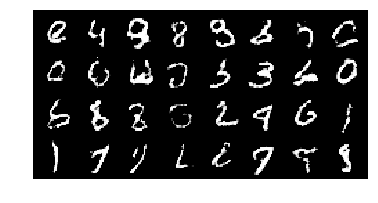

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


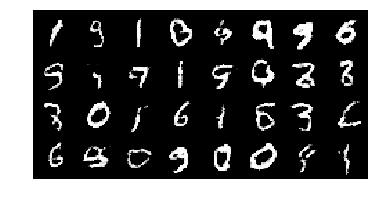

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


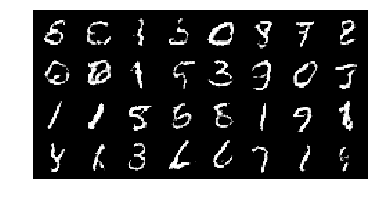

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


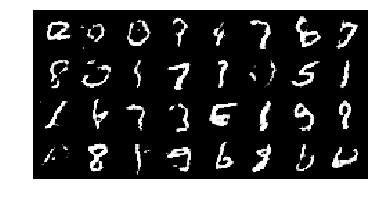

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


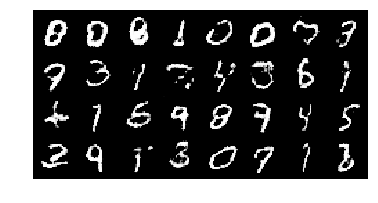

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


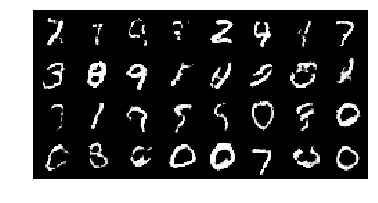

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


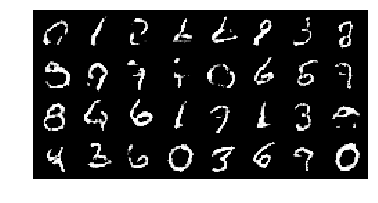

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


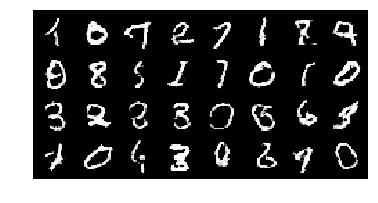

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


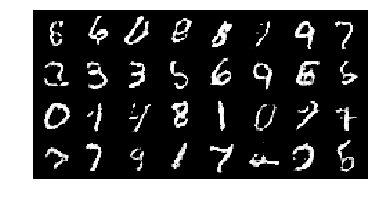

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


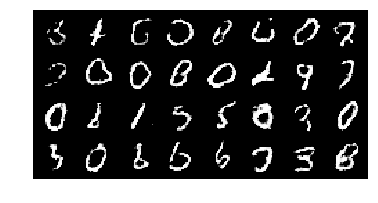

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


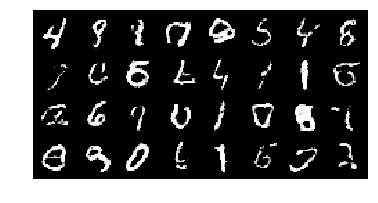

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


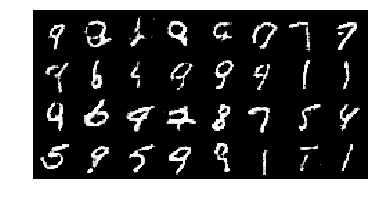

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


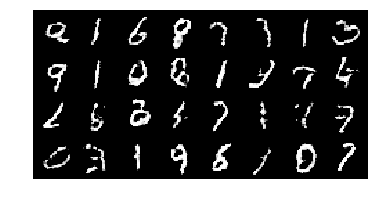

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


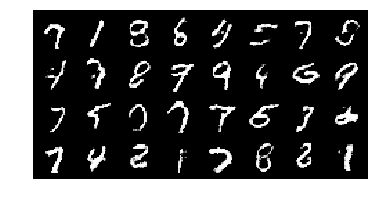

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


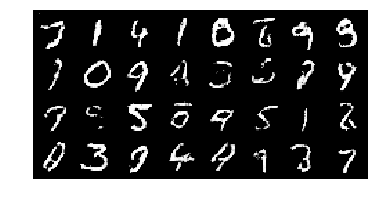

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


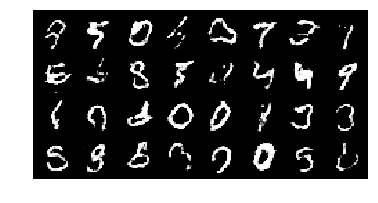

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


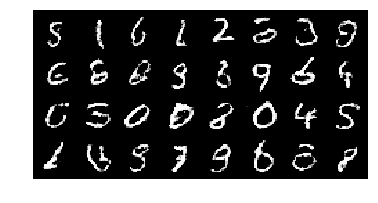

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


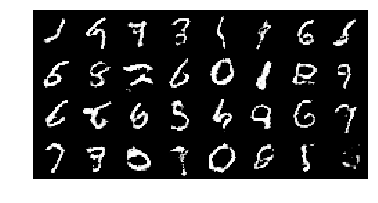

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


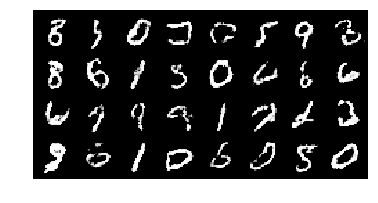

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


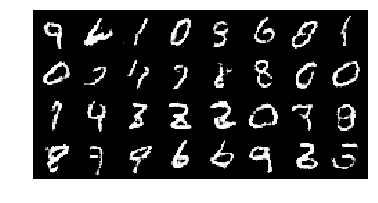

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


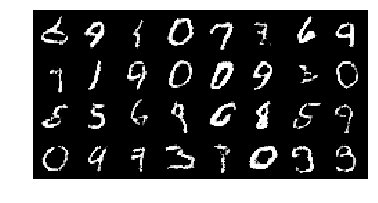

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


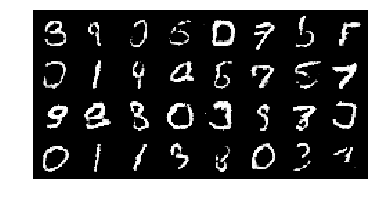

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


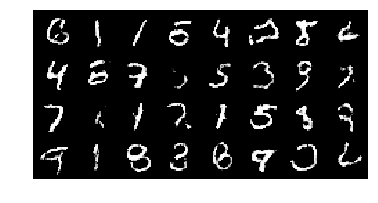

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


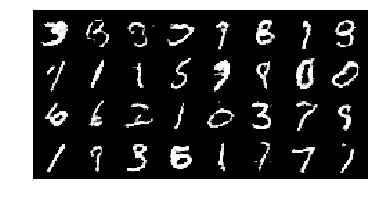

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


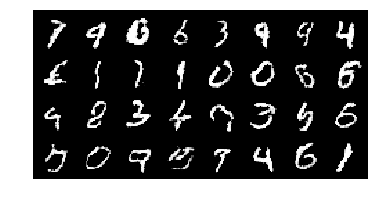

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


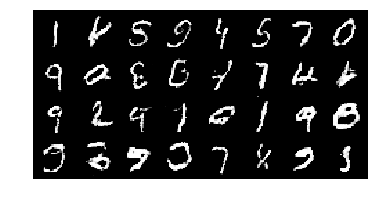

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


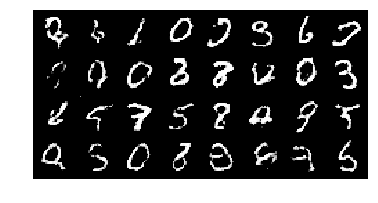

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


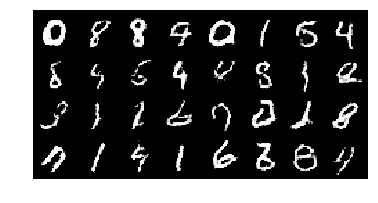

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


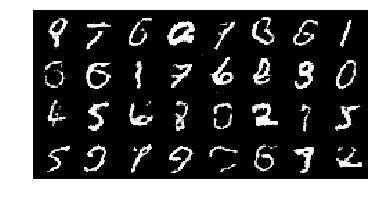

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


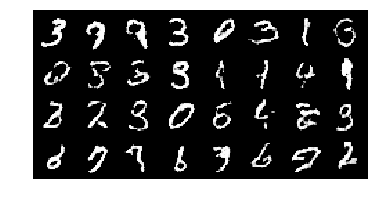

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


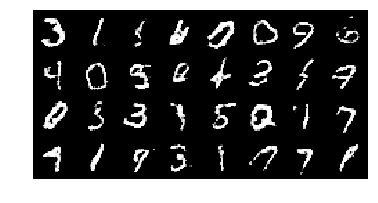

In [35]:
while epoch < num_epochs:
    for batch_idx, (image, _) in enumerate(dataloader):
        image = image.to(device)
        
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

         
        generated_image = generator(torch.randn(batch_size, 100).to(device))
        
        generator_loss = adversarial_loss(discriminator(generated_image), real_labels)
        
        gen_optimizer.zero_grad()
        generator_loss.backward()
        gen_optimizer.step()
        

        #code here
        disc_output = discriminator(image)
        discriminator_loss = adversarial_loss(disc_output, real_labels) + adversarial_loss(discriminator(generated_image.detach()), fake_labels)
            
        dis_optimizer.zero_grad()
        discriminator_loss.backward()
        dis_optimizer.step()
        
        
        dis_losses.append(discriminator_loss.item()) 
        gen_losses.append(generator_loss.item())
        
#         if batch_idx % 500 == 0:
#             show(torchvision.utils.make_grid(generated_image.cpu().detach()))
            
        if batch_idx % 500 == 0:
            plt.figure()
            show_image(generated_image)
            plt.axis('off')
            plt.ioff()
            plt.show()
        
    epoch += 1

<h2>Дополнительная теория</h2>
<h3>Batch Norm: https://www.youtube.com/watch?v=nUUqwaxLnWs</h3>
<h3>Convolutions and Deconvolutions: http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html</h3>
<h3>Up-sampling with Transposed Convolution: https://towardsdatascience.com/up-sampling-with-transposed-convolution-9ae4f2df52d0</h3>